### Extracting entities & describing relationships ML Model

In [1]:
import pandas as pd

In [2]:
# Load Data
news_df = pd.read_csv('../data/processed/labelled_data/SbertAttempt4.csv')

# Check data structure
print(news_df.head())
print(news_df.info())

                                                Link  \
0  https://edition.cnn.com/2023/09/29/business/st...   
1  https://www.channelnewsasia.com/singapore/su-w...   
2  https://edition.cnn.com/2023/05/22/tech/meta-f...   
3  https://www.channelnewsasia.com/singapore/bill...   
4  https://edition.cnn.com/2024/03/05/politics/li...   

                                                Text  \
0  Starbucks violated federal labor law when it i...   
1  The first suspect to plead guilty in Singapore...   
2  Meta has been fined a record-breaking €1.2 bil...   
3  SINGAPORE: A 45-year-old man linked to Singapo...   
4  The Department of Education imposed a record $...   

                      key_figures  \
0                              []   
1    ['3 billion', '2.2 billion']   
2  ['1.2 billion', '1.3 billion']   
3  ['118 million', '131 million']   
4     ['14 million', '2 million']   

                                      cleaned_tokens  \
0  ['starbucks', 'violate', 'federal', 'labor',

In [4]:
#drop unncessary columns
# Drop 'UMAP_1' and 'UMAP_2' columns
news_df = news_df.drop(columns=['UMAP_1', 'UMAP_2', 'Link', 'key_figures'])

print(news_df.head())


                                                Text  \
0  Starbucks violated federal labor law when it i...   
1  The first suspect to plead guilty in Singapore...   
2  Meta has been fined a record-breaking €1.2 bil...   
3  SINGAPORE: A 45-year-old man linked to Singapo...   
4  The Department of Education imposed a record $...   

                                      cleaned_tokens  \
0  ['starbucks', 'violate', 'federal', 'labor', '...   
1  ['first', 'suspect', 'plead', 'guilty', 'singa...   
2  ['meta', 'fin', 'record', 'break', 'billion', ...   
3  ['singapore', 'year', 'old', 'man', 'link', 's...   
4  ['department', 'education', 'impose', 'record'...   

                                      named_entities  Cluster  
0  [('Starbucks', 'ORG'), ('National Labor Relati...        3  
1  [('first', 'ORDINAL'), ('Singapore', 'GPE'), (...        2  
2  [('Meta', 'ORG'), ('€1.2 billion', 'MONEY'), (...        3  
3  [('SINGAPORE', 'GPE'), ('45-year-old', 'DATE')...        2  
4  [('

#### Clustering

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans

# # Convert text into numerical features
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(news_df["cleaned_tokens"])  # Assuming 'text' column

# # Apply K-Means clustering
# num_clusters = 10  # Define based on the dataset
# model = KMeans(n_clusters=num_clusters, random_state=42)
# clusters = model.fit_predict(X)

# # Assign clusters to the dataset
# news_df["cluster"] = clusters

labelling clusters

In [7]:
# Define the cluster to label mapping
cluster_map = {
    0: 'Tribal Affairs and Regional Violent Incidents',
    1: 'Celebrity News and Entertainment',
    2: 'Monetary and Financial Law Violations',
    3: 'Legal and Regulatory Violations',
    4: 'International Relations and Foreign Affairs',
    5: 'Social and Local News',
    6: 'Drug and Tobacco-Related Issues',
    7: 'Violent Crime Incidents',
    8: 'Corporate Affairs and Market Dynamics',
    9: 'Medical News and Advancements'
}

# Add the 'cluster_label' column
news_df['category'] = news_df['Cluster'].map(cluster_map)

print(news_df.head())

                                                Text  \
0  Starbucks violated federal labor law when it i...   
1  The first suspect to plead guilty in Singapore...   
2  Meta has been fined a record-breaking €1.2 bil...   
3  SINGAPORE: A 45-year-old man linked to Singapo...   
4  The Department of Education imposed a record $...   

                                      cleaned_tokens  \
0  ['starbucks', 'violate', 'federal', 'labor', '...   
1  ['first', 'suspect', 'plead', 'guilty', 'singa...   
2  ['meta', 'fin', 'record', 'break', 'billion', ...   
3  ['singapore', 'year', 'old', 'man', 'link', 's...   
4  ['department', 'education', 'impose', 'record'...   

                                      named_entities  Cluster  \
0  [('Starbucks', 'ORG'), ('National Labor Relati...        3   
1  [('first', 'ORDINAL'), ('Singapore', 'GPE'), (...        2   
2  [('Meta', 'ORG'), ('€1.2 billion', 'MONEY'), (...        3   
3  [('SINGAPORE', 'GPE'), ('45-year-old', 'DATE')...        2   
4

### Visualising the clusters/categories

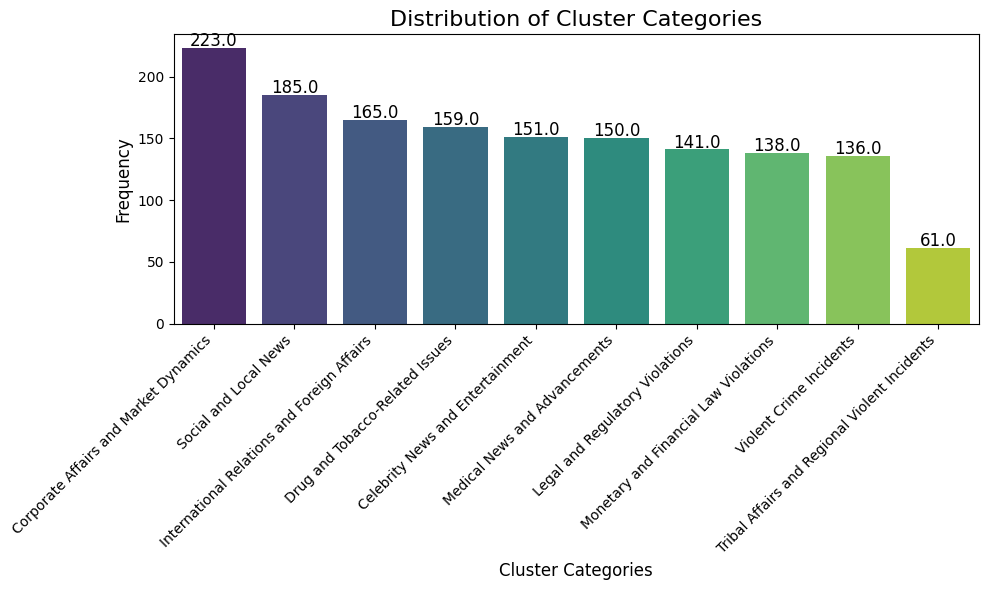

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better clarity
plt.figure(figsize=(10, 6))

# Create the seaborn bar chart for the distribution of cluster labels
ax = sns.countplot(data=news_df, x='category', order=news_df['category'].value_counts().index, palette='viridis')

# Add title and labels
plt.title('Distribution of Cluster Categories', fontsize=16)
plt.xlabel('Cluster Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Example: Assume `cluster_texts` is a list of text samples for each cluster
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(news_df["cleaned_tokens"])
feature_array = np.array(vectorizer.get_feature_names_out())

# Get the top keywords per cluster
def get_top_keywords(X, labels, n_terms=10):
    for cluster_num in set(labels):
        indices = np.where(labels == cluster_num)  # Get indices for this cluster
        mean_tfidf = np.mean(X[indices], axis=0)  # Compute mean TF-IDF score
        top_keywords = feature_array[np.argsort(mean_tfidf.A1)[::-1][:n_terms]]
        print(f"Cluster {cluster_num}: {', '.join(top_keywords)}")
        print('\n')

get_top_keywords(X, news_df["category"])

Cluster Drug and Tobacco-Related Issues: say, attack, israel, force, russian, russia, group, military, gaza, ukraine


Cluster Tribal Affairs and Regional Violent Incidents: tribe, indigenous, people, land, river, say, forest, nation, community, live


Cluster Social and Local News: singapore, food, originate, make, dish, say, open, brand, use, restaurant


Cluster Medical News and Advancements: cancer, hospital, study, health, patients, singapore, dr, medical, medicine, say


Cluster Legal and Regulatory Violations: million, say, company, billion, bank, china, market, law, data, financial


Cluster Corporate Affairs and Market Dynamics: million, company, billion, say, ai, cent, singapore, market, share, technology


Cluster Celebrity News and Entertainment: say, school, bear, singapore, year, mr, old, family, university, time


Cluster Monetary and Financial Law Violations: court, sentence, charge, mr, singapore, say, jail, police, million, guilty


Cluster Violent Crime Incidents: sa

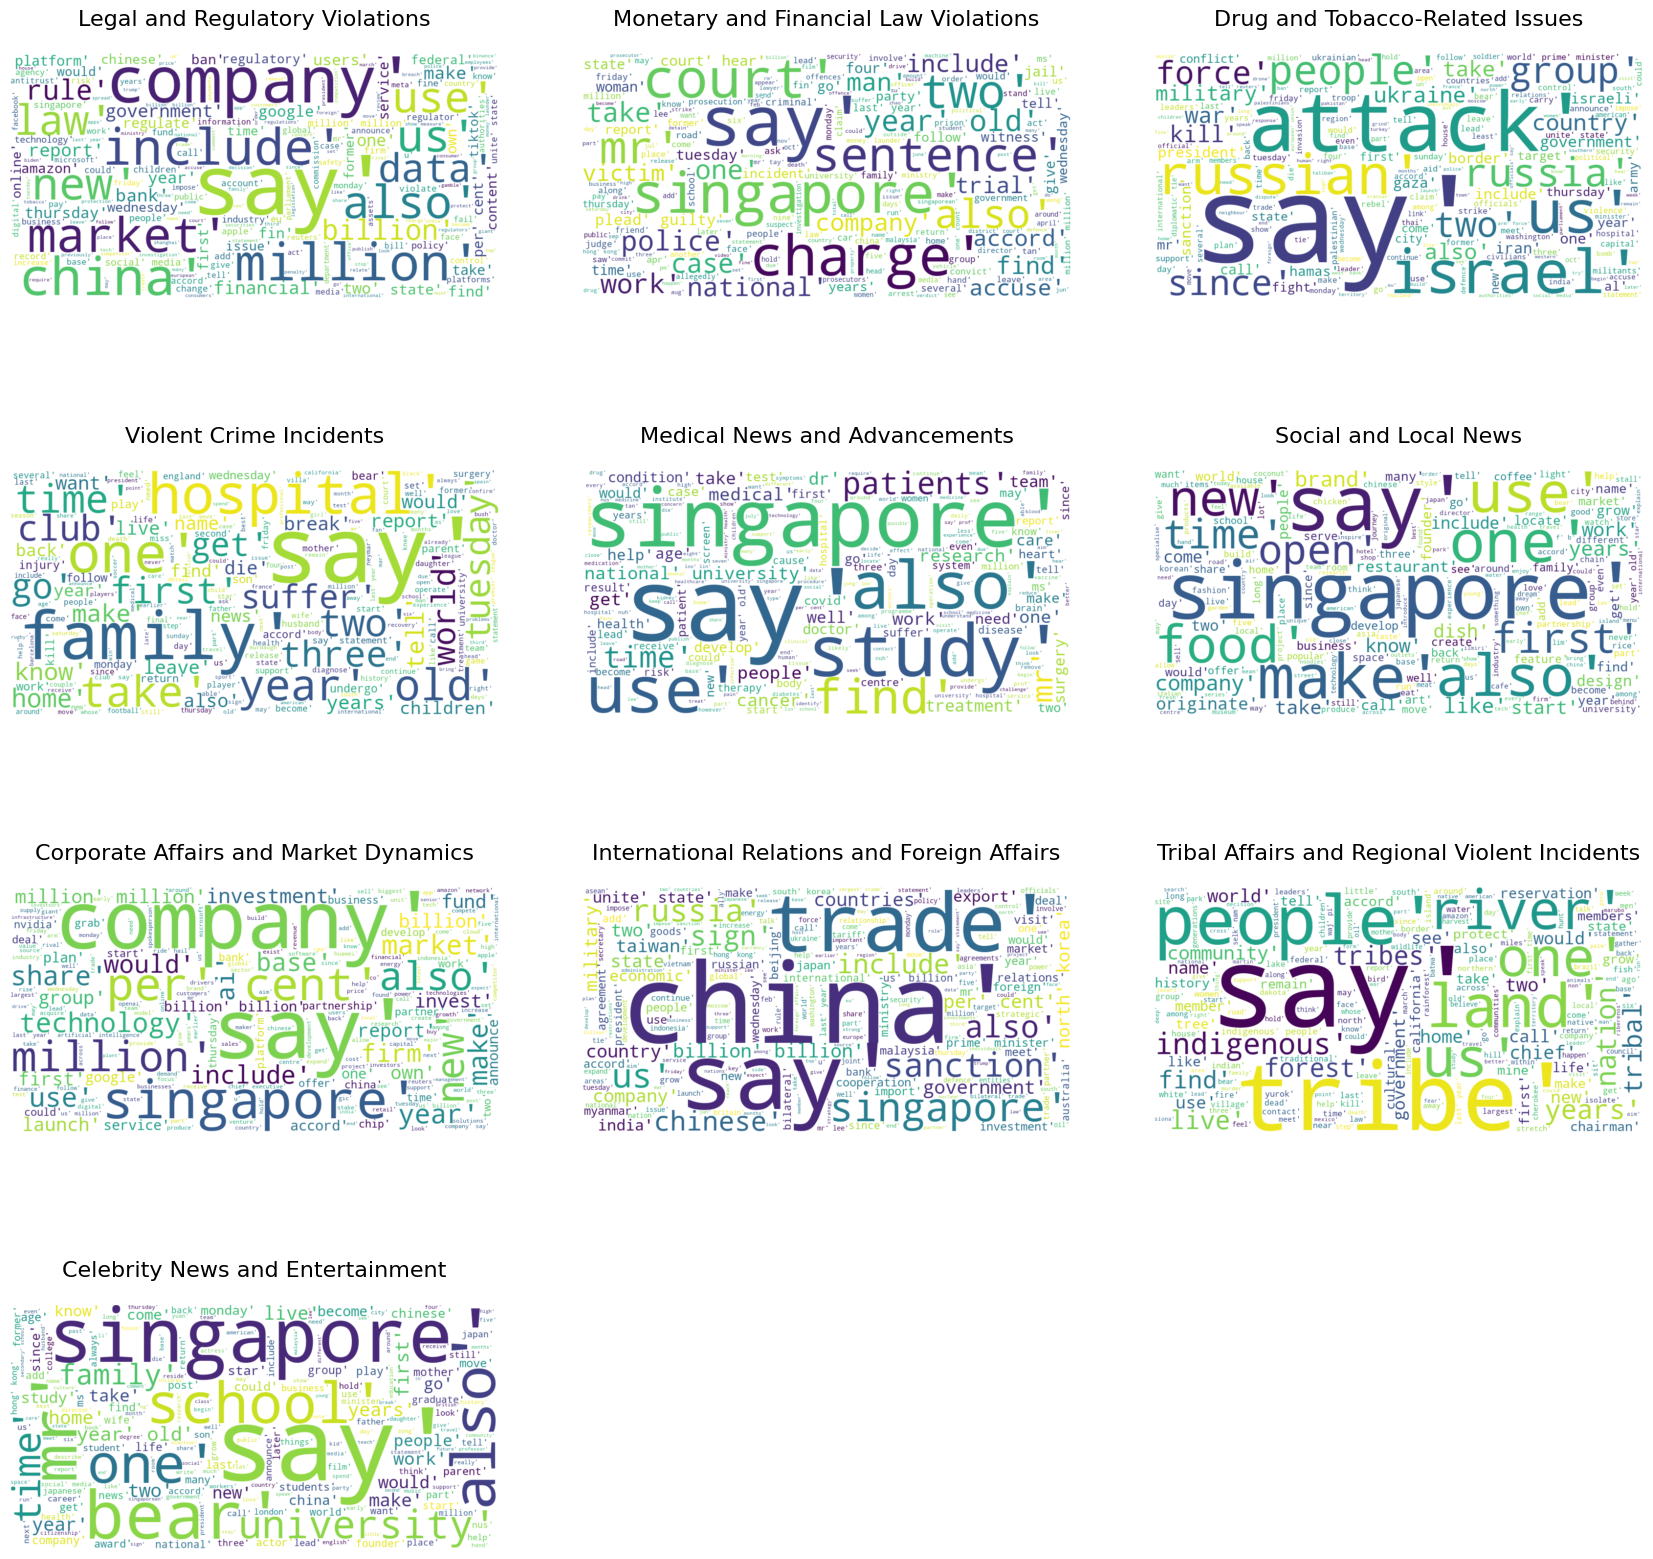

In [94]:
#word cloud for each category
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set a larger figure size
plt.figure(figsize=(18, 18))

# Calculate the number of rows and columns needed for the subplots
n_categories = len(news_df['category'].unique())
n_cols = 3  # Number of columns
n_rows = (n_categories // n_cols) + (n_categories % n_cols > 0)  # Calculate rows needed

# Iterate over each unique category in 'cluster_label'
for i, category in enumerate(news_df['category'].unique()):
    # Filter the DataFrame to get the text for the current category
    category_text = ' '.join(news_df[news_df['category'] == category]['cleaned_tokens'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(category_text)
    
    # Create a subplot for each category with a bit more spacing
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(category, fontsize=16, pad=20)  # Increased padding for the titles

# Adjust layout to ensure spacing between subplots
plt.tight_layout(pad=6.0)  # Increase padding between plots
plt.show()


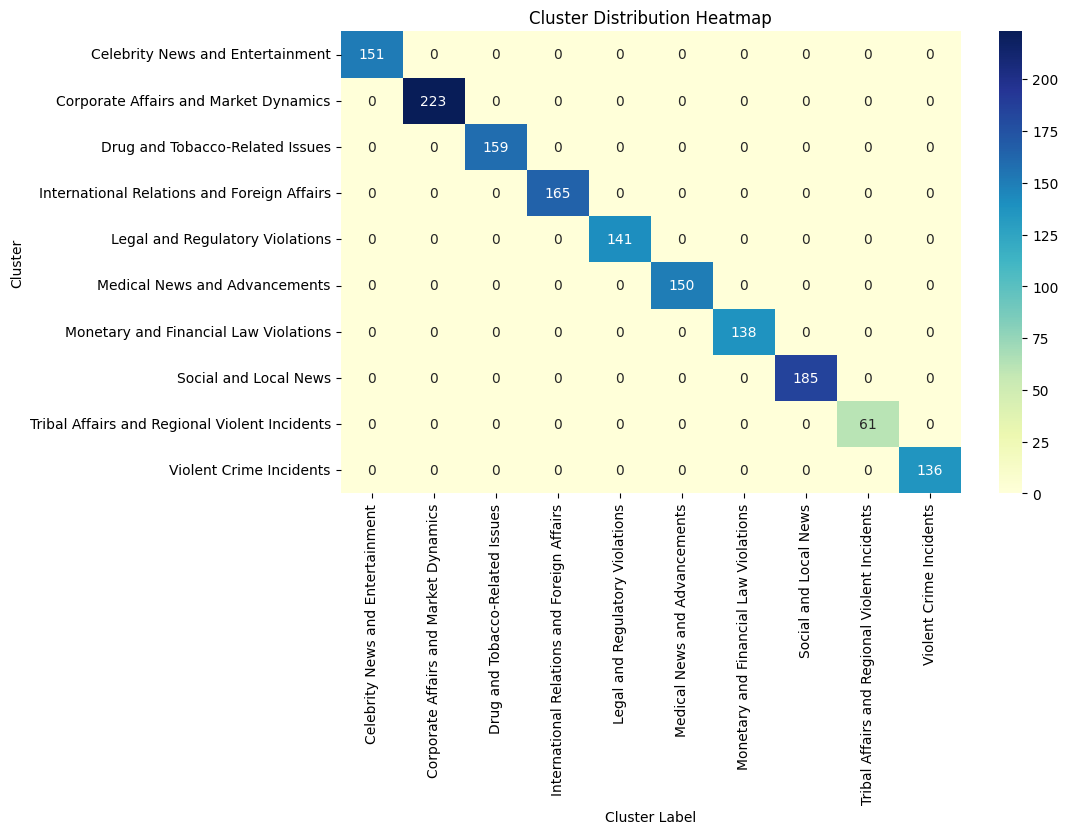

In [27]:
#heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
cluster_distribution = pd.crosstab(news_df['category'], news_df['category'])
sns.heatmap(cluster_distribution, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Cluster Distribution Heatmap')
plt.ylabel('Cluster')
plt.xlabel('Cluster Label')
plt.show()

The heatmap shows that there are no correlation between other clusters which is what we are trying to achieve by ensuring there is no overlap between the clusters.

### Splitting data to training and testing

Since there is class imbalance for tribal affairs, we will use stratified train-test split to ensure that all categories are proportionally represented in both train and test sets. This will allow the ML model to work well even when there are fewer samples in certain categories

In [29]:
pip install sentence-transformers

  Obtaining dependency information for sentence-transformers from https://files.pythonhosted.org/packages/05/89/7eb147a37b7f31d3c815543df539d8b8d0425e93296c875cc87719d65232/sentence_transformers-3.4.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/275.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/275.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/275.9 kB 217.9 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/275.9 kB 465.5 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/275.9 kB 722.1 kB/s eta 0:00:01
   ------------------------------------- -- 256.0/275.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 275.9/275.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained sBERT model (you can change the model if needed)
model = SentenceTransformer('all-MiniLM-L6-v2')  # 384-dimensional embeddings

news_df['sbert_embedding'] = news_df['Text'].apply(lambda x: model.encode(str(x)))

print(news_df.head())

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\dtpz2\Documents\anaconda\envs\mlops\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dtpz2\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

                                                Text  \
0  Starbucks violated federal labor law when it i...   
1  The first suspect to plead guilty in Singapore...   
2  Meta has been fined a record-breaking €1.2 bil...   
3  SINGAPORE: A 45-year-old man linked to Singapo...   
4  The Department of Education imposed a record $...   

                                      cleaned_tokens  \
0  ['starbucks', 'violate', 'federal', 'labor', '...   
1  ['first', 'suspect', 'plead', 'guilty', 'singa...   
2  ['meta', 'fin', 'record', 'break', 'billion', ...   
3  ['singapore', 'year', 'old', 'man', 'link', 's...   
4  ['department', 'education', 'impose', 'record'...   

                                      named_entities  Cluster  \
0  [('Starbucks', 'ORG'), ('National Labor Relati...        3   
1  [('first', 'ORDINAL'), ('Singapore', 'GPE'), (...        2   
2  [('Meta', 'ORG'), ('€1.2 billion', 'MONEY'), (...        3   
3  [('SINGAPORE', 'GPE'), ('45-year-old', 'DATE')...        2   
4

In [31]:
# Save as a pickle file (preferred for loading later)
news_df.to_pickle("news_dataset_with_sbert.pkl")

In [32]:
# Print the first embedding
print(news_df['sbert_embedding'].iloc[0])  # This will print a NumPy array

# Check the shape of an embedding
print(len(news_df['sbert_embedding'].iloc[0]))  # Should be 384 for 'all-MiniLM-L6-v2'

# Convert all embeddings into a NumPy array
X = np.vstack(news_df['sbert_embedding'].values)
print("Final embedding matrix shape:", X.shape)  # (num_samples, embedding_dim)


[-2.64702681e-02  1.95985311e-03  2.60229800e-02  4.27279212e-02
  4.40929495e-02  3.77767123e-02  1.30486088e-02 -2.40858402e-02
 -4.04509529e-02  2.50354279e-02 -1.02352202e-02  7.27811232e-02
  6.96655503e-03  5.41093107e-03  8.81784558e-02 -2.68870052e-02
  4.46190126e-02  4.82354909e-02  2.00843830e-02 -5.53987511e-02
  3.87345105e-02 -7.30679557e-02 -6.57652617e-02  2.55986787e-02
 -7.58547382e-03 -2.99150515e-02 -4.60203476e-02 -3.77852060e-02
 -5.71950637e-02 -2.24114507e-02 -9.39399377e-02 -2.15674862e-02
  6.16262406e-02  3.87247168e-02 -2.96105701e-03 -6.77650496e-02
  6.93748817e-02 -6.76272139e-02  3.32577014e-03 -3.21910232e-02
  1.01035526e-02 -9.03853998e-02 -5.18808067e-02  7.83376098e-02
  1.89103875e-02  1.29147936e-02 -6.31576916e-03 -1.28901722e-02
 -6.06617630e-02  5.07084876e-02  3.17610539e-02 -1.79139506e-02
  9.12770554e-02  2.03587785e-02  9.11425892e-03 -2.83005591e-02
  5.83087280e-02  1.02262590e-02  1.16769351e-01  6.89051524e-02
  4.31970619e-02 -1.14388

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert embeddings to NumPy arrays
X = np.vstack(news_df['sbert_embedding'])
y = news_df['Cluster'] 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### Modelling
1. XGBoost
2. SVM
3. MLP (NN)
4. LR

In [47]:
import xgboost as xgb

# 1. Train XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

C:\Users\dtpz2\Documents\anaconda\envs\mlops\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.7318


In [38]:
# 2. Train Support Vector Machine (SVM)
# ----------------------------
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc:.4f}")

SVM Accuracy:              0.8212


In [42]:
# 3. Train Multi-Layer Perceptron (MLP)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

mlp_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y)), activation='softmax')  # Output layer for multi-class classification
])

mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Evaluate MLP model
mlp_loss, mlp_acc = mlp_model.evaluate(X_test, y_test, verbose=0)

print(f"MLP (Neural Network) Accuracy: {mlp_acc:.4f}")


C:\Users\dtpz2\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3012 - loss: 2.0550 - val_accuracy: 0.7649 - val_loss: 0.8251
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8150 - loss: 0.6403 - val_accuracy: 0.7947 - val_loss: 0.5866
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8724 - loss: 0.4201 - val_accuracy: 0.8245 - val_loss: 0.4863
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9240 - loss: 0.2494 - val_accuracy: 0.8179 - val_loss: 0.4988
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9438 - loss: 0.1942 - val_accuracy: 0.7914 - val_loss: 0.5374
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9478 - loss: 0.1760 - val_accuracy: 0.8046 - val_loss: 0.5667
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9720 - loss: 0.1186 - val_accuracy: 0.8079 - val_loss: 0.5572
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9825 - loss: 0.0855 - val_accuracy: 0.8113 - val_loss

In [43]:
# 4. Train Logistic Regression (Baseline)
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_acc = accuracy_score(y_test, y_pred_logistic)

print(f"Logistic Regression Accuracy: {logistic_acc:.4f}")

Logistic Regression Accuracy: 0.8146


In [49]:
# ----------------------------
# 📊 Compare Model Performance
# ----------------------------
print("\n📊 Model Accuracy Comparison:")
print(f"1. XGBoost Accuracy:          {xgb_acc:.4f}")
print(f"2. SVM Accuracy:              {svm_acc:.4f}")
print(f"3. MLP (Neural Network) Accuracy: {mlp_acc:.4f}")
print(f"4. Logistic Regression Accuracy: {logistic_acc:.4f}")


📊 Model Accuracy Comparison:
1. XGBoost Accuracy:          0.7318
2. SVM Accuracy:              0.8212
3. MLP (Neural Network) Accuracy: 0.7748
4. Logistic Regression Accuracy: 0.8146


Seems like SVM has the highest accuracy amongst the models at 82.1%, followed by LR at 81.5%. Next, let's do hyper parameter tuning for SVM.

### Fine-Tuning the Best Model (SVM)
1. Hyperparameter Tuning: Tune the C, kernel, and other hyperparameters using Grid Search or Randomized Search to find the optimal configuration.
2. Cross-validation: Use cross-validation (e.g., StratifiedKFold) to get a better estimate of model performance.
3. Class Imbalance: Adding class weights or SMOTE (Synthetic Minority Over-sampling Technique).

#### 1. Hyperparameter Tuning

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.8278

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.66      0.63      0.64        30
           2       0.87      0.93      0.90        28
           3       0.77      0.82      0.79        28
           4       0.94      0.88      0.91        33
           5       0.73      0.86      0.79        37
           6       1.00      0.81      0.90        32
           7       0.75      0.78      0.76        27
           8       0.86      0.84      0.85        45
           9       0.87      0.87      0.87        30

    accuracy                           0.83       302
   macro avg       0.84      0.83      0.83       302
weighted avg       0.84      0.83      0.83       302



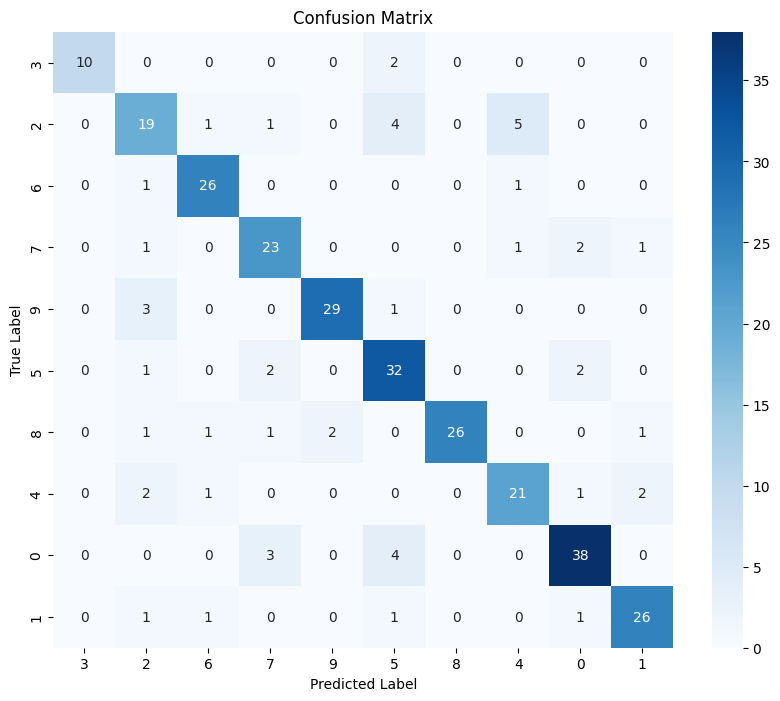

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ------------------------------
# 1️⃣ Hyperparameter Tuning with GridSearchCV
# ------------------------------
# Standardizing the data (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],  # Common kernels for SVM
    'gamma': ['scale', 'auto', 0.1, 1],  # Gamma values for non-linear kernels
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters found: {best_params}")

# ------------------------------
# 2️⃣ Evaluate the Best Model from GridSearch
# ------------------------------
# Best SVM model from GridSearch
best_svm = grid_search.best_estimator_

# Make predictions
y_pred = best_svm.predict(X_test_scaled)

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# ------------------------------
# 3️⃣ Evaluate Model Performance with Additional Metrics
# ------------------------------
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



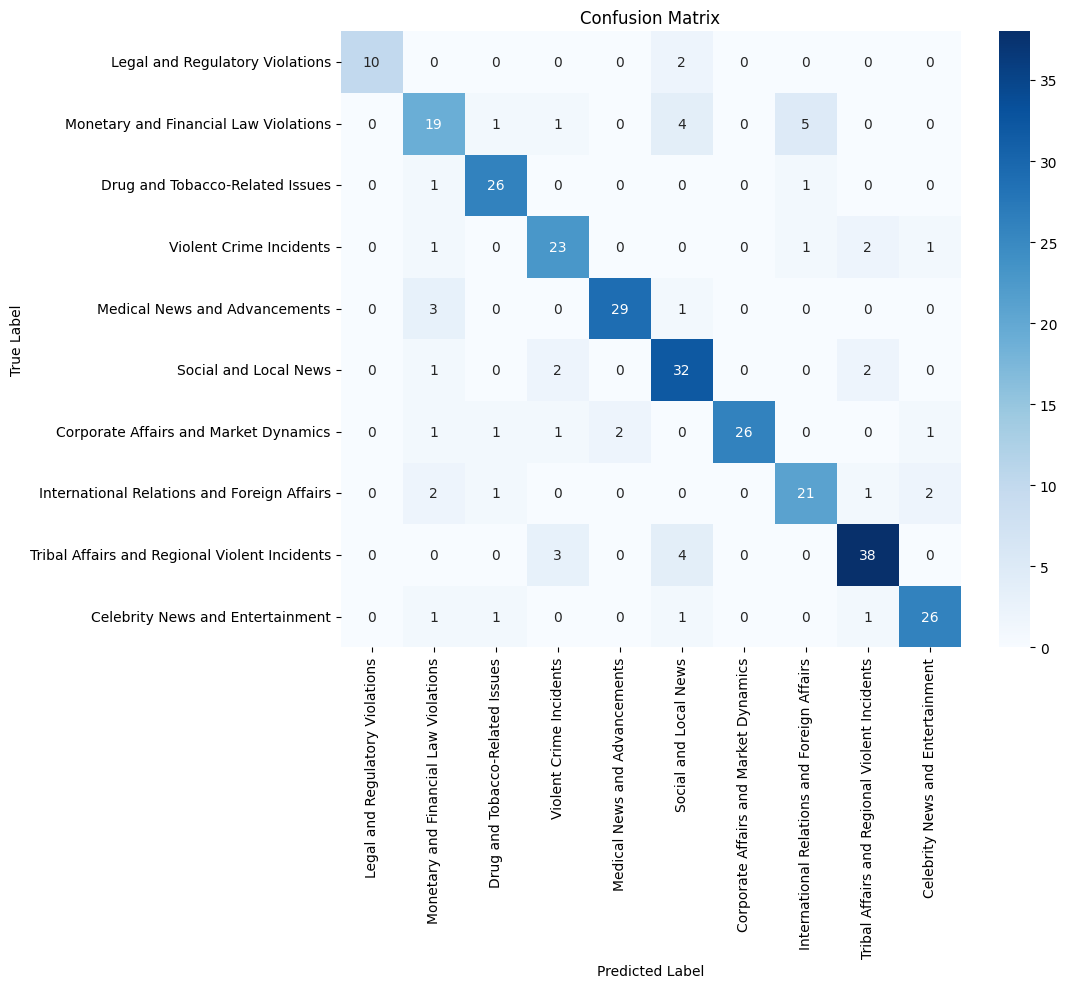

In [61]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=news_df['category'].unique(), yticklabels=news_df['category'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The diagonal elements represent correct predictions (i.e., true positives), while off-diagonal elements represent misclassifications.

For example, Monetary and Financal Law Violations and Tribal Affairs have 5 misclassified news.

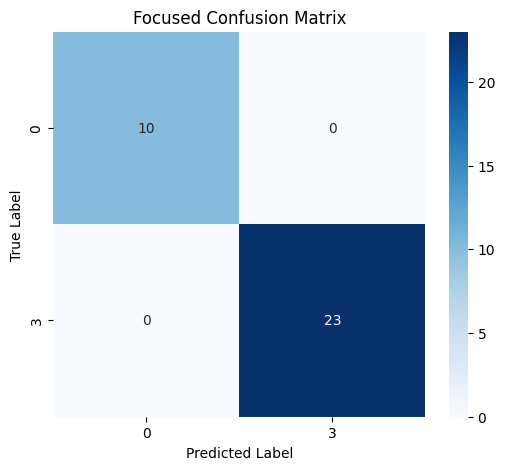

In [62]:
# Zoom into classes 0 and 3
focus_classes = [0, 3]  # Select the classes you want to focus on
cm_focus = cm[np.ix_(focus_classes, focus_classes)]

# Plot the focused confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_focus, annot=True, fmt='d', cmap='Blues', xticklabels=focus_classes, yticklabels=focus_classes)
plt.title('Focused Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


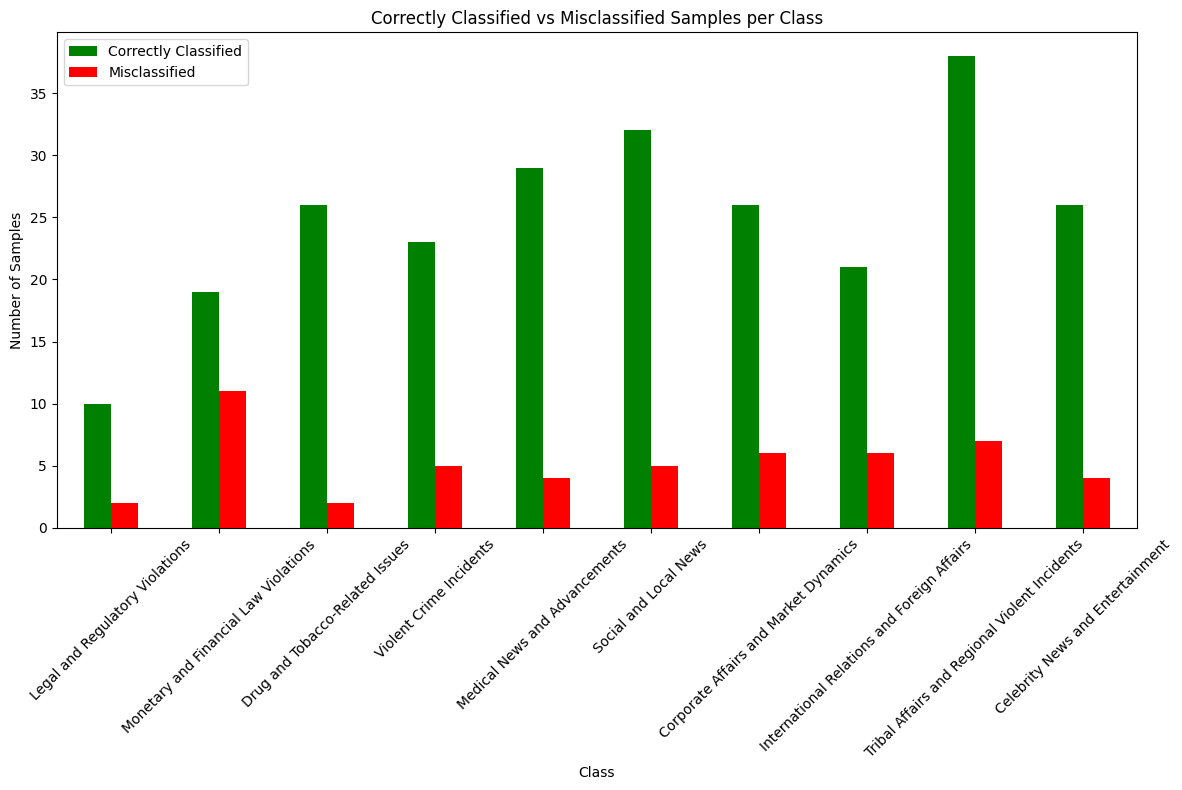

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create DataFrame to store correctly and misclassified counts
correctly_classified = np.diag(cm)  # Diagonal represents correctly classified instances
misclassified = cm.sum(axis=1) - correctly_classified  # Sum of rows - correctly classified gives misclassified instances

# Create a DataFrame for visualization
classes = news_df['category'].unique()  # Replace this with your actual class labels
classification_df = pd.DataFrame({
    'Class': classes,
    'Correctly Classified': correctly_classified,
    'Misclassified': misclassified
})

# Plotting the bar chart
classification_df.set_index('Class').plot(kind='bar', stacked=False, figsize=(12, 8), color=['green', 'red'])
plt.title('Correctly Classified vs Misclassified Samples per Class')
plt.ylabel('Number of Samples')
plt.xlabel('Class')
plt.xticks(rotation=45)
plt.legend(['Correctly Classified', 'Misclassified'])
plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()


### 2. Cross-Validation - Splitting the data into training and testing sets multiple times

In [70]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Convert y_train to numpy array
y_train_array = y_train.to_numpy()

# StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_train_scaled, y_train_array):
    X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]
    
    # Train the model on each fold
    best_svm.fit(X_train_fold, y_train_fold)
    y_pred = best_svm.predict(X_test_fold)
    
    # Evaluate model performance
    acc = accuracy_score(y_test_fold, y_pred)
    print(f"Fold Accuracy: {acc:.4f}")


Fold Accuracy: 0.8471
Fold Accuracy: 0.8099
Fold Accuracy: 0.8340
Fold Accuracy: 0.8382
Fold Accuracy: 0.8340


### 3- Using SMOTE (Synthetic Minority Over-sampling Technique) to overcome class imbalance

In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train an SVM model on the resampled data
model = SVC(kernel='linear', class_weight='balanced')  # You can use balanced class weight in SVM as well
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_smote = model.predict(X_test_scaled)

# Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"SVM Model Accuracy after SMOTE: {accuracy_smote:.4f}")

SVM Model Accuracy after SMOTE: 0.7848


the accuracy dropped. lets try undersampling instead 

In [77]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Apply undersampling to balance the classes
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Fit and resample the training data
X_train_res, y_train_res = undersampler.fit_resample(X_train_scaled, y_train)

# Train SVM model on the undersampled data
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8311258278145696

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.74      0.67      0.70        30
           2       0.78      0.89      0.83        28
           3       0.77      0.86      0.81        28
           4       0.97      0.85      0.90        33
           5       0.79      0.84      0.82        37
           6       0.96      0.78      0.86        32
           7       0.72      0.78      0.75        27
           8       0.91      0.89      0.90        45
           9       0.79      0.90      0.84        30

    accuracy                           0.83       302
   macro avg       0.84      0.83      0.83       302
weighted avg       0.84      0.83      0.83       302



The accuracy of undersampling is higher than oversampling. however, undersampling in a scenario where the class distribution is imbalanced, with the smallest class having 61 examples and the largest having 200+, can be problematic. Removing over 100 rows can lead to significant loss of information, especially if you don't have much data to begin with. In this case, undersampling might not be the best approach. Therefore, we will try an alternative sampling method:

Class Weight Adjustment: Start by using class_weight='balanced' in your SVM model. This way, the model will automatically adjust its focus on the minority class without modifying the dataset.

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train SVM with class weights
svm_model_weighted = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)
svm_model_weighted.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model_weighted.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8344370860927153

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.66      0.70      0.68        30
           2       0.87      0.93      0.90        28
           3       0.77      0.82      0.79        28
           4       0.94      0.88      0.91        33
           5       0.75      0.89      0.81        37
           6       1.00      0.81      0.90        32
           7       0.76      0.81      0.79        27
           8       0.90      0.78      0.83        45
           9       0.87      0.90      0.89        30

    accuracy                           0.83       302
   macro avg       0.85      0.84      0.84       302
weighted avg       0.84      0.83      0.84       302



Best Param & Sampling method:
- Best Params: kernel='rbf', C=1, gamma='scale', class_weight='balanced'
- Sampling method: Class Weight Adjustment

#### Ensemble Methods

In [84]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Define individual models (make sure these are correct and initialized)
xgb_model = XGBClassifier(random_state=42)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', probability=True, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Create the ensemble model using soft voting (based on probabilities)
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('svm', svm_model),
    ('mlp', mlp_model),
    ('logreg', logreg_model)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

# Optionally, display classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))

Ensemble Model Accuracy: 0.7914

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.53      0.63      0.58        30
           2       0.77      0.82      0.79        28
           3       0.73      0.79      0.76        28
           4       0.94      0.91      0.92        33
           5       0.74      0.84      0.78        37
           6       1.00      0.78      0.88        32
           7       0.74      0.74      0.74        27
           8       0.85      0.76      0.80        45
           9       0.86      0.83      0.85        30

    accuracy                           0.79       302
   macro avg       0.81      0.79      0.80       302
weighted avg       0.80      0.79      0.80       302



#### stacking

Stacking Model Accuracy: 0.8411

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.67      0.73      0.70        30
           2       0.84      0.93      0.88        28
           3       0.79      0.82      0.81        28
           4       0.94      0.91      0.92        33
           5       0.78      0.86      0.82        37
           6       1.00      0.81      0.90        32
           7       0.76      0.81      0.79        27
           8       0.86      0.82      0.84        45
           9       0.93      0.87      0.90        30

    accuracy                           0.84       302
   macro avg       0.86      0.84      0.85       302
weighted avg       0.85      0.84      0.84       302



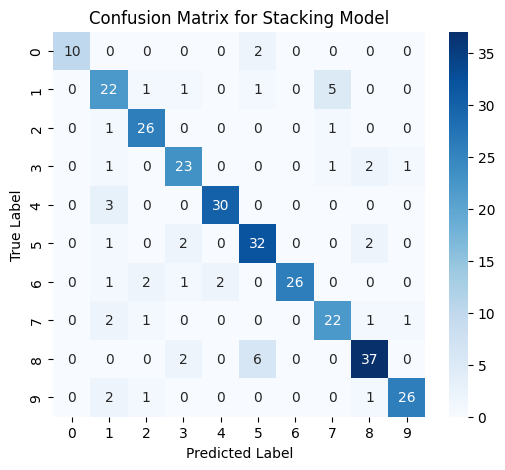

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = stacking_model.predict(X_test_scaled)

# Accuracy Score
stacking_accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {stacking_accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Stacking Model")
plt.show()


📊 Model Accuracy Comparison:
                      Model  Accuracy
             Stacking Model  0.841060
SVM (Class Weight Balanced)  0.841060
        SVM (Undersampling)  0.841060
      SVM (GridSearch Best)  0.834025
        Logistic Regression  0.814570
      Voting Ensemble Model  0.791391
                SVM (SMOTE)  0.784768
       MLP (Neural Network)  0.774834
                    XGBoost  0.731788


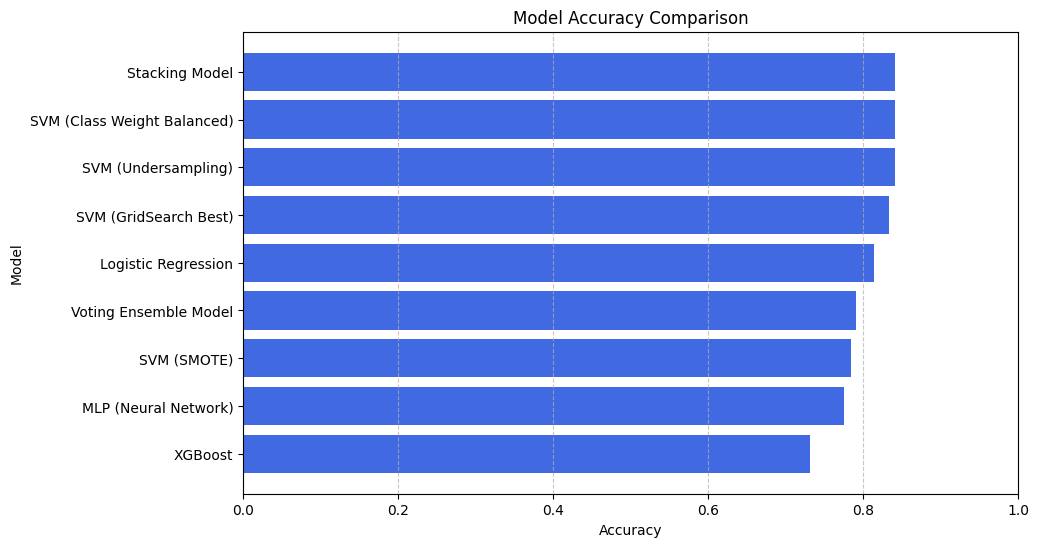

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Store model names and accuracies
model_accuracies = {
    "Stacking Model": stacking_accuracy,
    "Voting Ensemble Model": ensemble_accuracy,
    "SVM (Class Weight Balanced)": accuracy_score(y_test, y_pred),
    "SVM (Undersampling)": accuracy_score(y_test, y_pred),
    "SVM (SMOTE)": accuracy_smote,
    "SVM (GridSearch Best)": acc,
    "XGBoost": xgb_acc,
    "MLP (Neural Network)": mlp_acc,
    "Logistic Regression": logistic_acc
}

# Convert to DataFrame for easier visualization
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

# Display accuracy comparison table
print("\n📊 Model Accuracy Comparison:")
print(accuracy_df.to_string(index=False))

# Plot accuracy comparison
plt.figure(figsize=(10,6))
plt.barh(accuracy_df["Model"], accuracy_df["Accuracy"], color='royalblue')
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy Comparison")
plt.xlim([0, 1])
plt.gca().invert_yaxis()  # Invert to show highest accuracy on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Stacking the models has the highest accuracy at 84.1%. We will use stacking

In [148]:
import joblib

# Save the model
joblib.dump(stacking_model, "../models/stacking_model.pkl")

['../models/stacking_model.pkl']

In [152]:
# Load the saved model
stacking_model = joblib.load("../models/stacking_model.pkl")

# Make predictions
y_pred = stacking_model.predict(X_test_scaled)

# Accuracy Score
stacking_accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {stacking_accuracy:.4f}")

Stacking Model Accuracy: 0.8411


### Test the model on the wikileaks dataset

In [157]:
import pandas as pd 
import nltk
import nltk.tokenize as tk 
import matplotlib.pyplot as plt
import re as re
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
import numpy as np
from nltk.tag import pos_tag
from nltk.tokenize import MWETokenizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [158]:
# Load Data
wikileaks_df = pd.read_csv('../data/processed/labelled_data/SbertWikileaksClustered_labelled.csv')

# Check data structure
print(wikileaks_df.head())
print(wikileaks_df.info())

  PDF Path                                               Text  Cluster  \
0    1.pdf  Pristina Airport – Possible administrative irr...        7   
1    1.pdf  Investigative details\n\nIn his/her interviews...        7   
2   10.pdf  "An interoffice memorandum providing an “outst...        2   
3   10.pdf  "Allegation 2 & 3:\n\n(Specifically, three of ...        2   
4   10.pdf  "When asked about this in interview, the Divis...        2   

     UMAP_1    UMAP_2  
0  4.796811  6.000211  
1  4.860325  6.225600  
2  3.698993  4.374658  
3  3.606706  4.359647  
4  3.941153  4.557401  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PDF Path  143 non-null    object 
 1   Text      143 non-null    object 
 2   Cluster   143 non-null    int64  
 3   UMAP_1    143 non-null    float64
 4   UMAP_2    143 non-null    float64
dtypes: float64(2), int64(1), obje

In [159]:
# Check for missing values
print(wikileaks_df.isnull().sum())

# Check column names & data types
print(wikileaks_df.info())


PDF Path    0
Text        0
Cluster     0
UMAP_1      0
UMAP_2      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PDF Path  143 non-null    object 
 1   Text      143 non-null    object 
 2   Cluster   143 non-null    int64  
 3   UMAP_1    143 non-null    float64
 4   UMAP_2    143 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.7+ KB
None


In [160]:
# Define pre-processing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
mwe_tokenizer = MWETokenizer()

In [161]:
# Function to clean text but retain key figures
def clean_text_with_figures(text):
    # Remove special characters but retain key figures
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Remove everything except letters and spaces
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    # Add back the key figures to the token list
    return tokens

In [162]:
# Apply extraction and cleaning
wikileaks_df['cleaned_tokens'] = wikileaks_df['Text'].apply(lambda x: clean_text_with_figures(str(x)))

In [163]:
print(wikileaks_df.head())

  PDF Path                                               Text  Cluster  \
0    1.pdf  Pristina Airport – Possible administrative irr...        7   
1    1.pdf  Investigative details\n\nIn his/her interviews...        7   
2   10.pdf  "An interoffice memorandum providing an “outst...        2   
3   10.pdf  "Allegation 2 & 3:\n\n(Specifically, three of ...        2   
4   10.pdf  "When asked about this in interview, the Divis...        2   

     UMAP_1    UMAP_2                                     cleaned_tokens  
0  4.796811  6.000211  [pristina, airport, possible, administrative, ...  
1  4.860325  6.225600  [investigative, detail, interview, conduct, st...  
2  3.698993  4.374658  [interoffice, memorandum, provide, outstanding...  
3  3.606706  4.359647  [allegation, specifically, three, persons, bid...  
4  3.941153  4.557401  [ask, interview, divisional, manager, state, w...  



Generating Word Cloud...


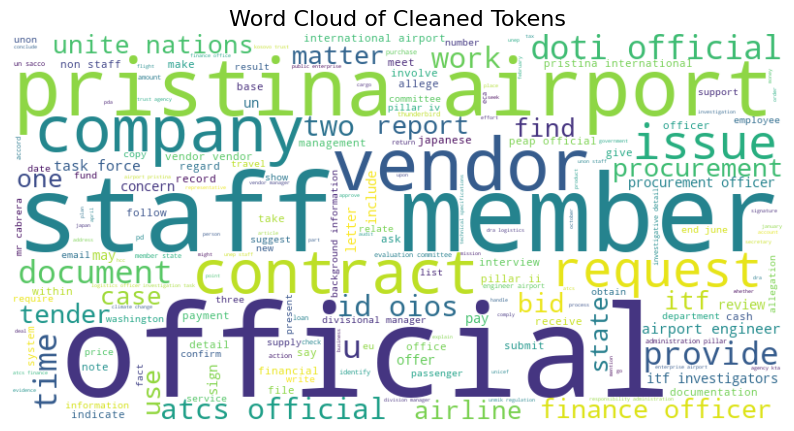

In [164]:
# Visualization: Word Cloud
print("\nGenerating Word Cloud...")
all_words = ' '.join([' '.join(tokens) for tokens in wikileaks_df['cleaned_tokens']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Tokens", fontsize=16)
plt.show()

In [165]:
# Load a pre-trained sBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  # 384-dimensional embeddings

wikileaks_df['sbert_embedding'] = wikileaks_df['Text'].apply(lambda x: model.encode(str(x)))

print(wikileaks_df.head())

  PDF Path                                               Text  Cluster  \
0    1.pdf  Pristina Airport – Possible administrative irr...        7   
1    1.pdf  Investigative details\n\nIn his/her interviews...        7   
2   10.pdf  "An interoffice memorandum providing an “outst...        2   
3   10.pdf  "Allegation 2 & 3:\n\n(Specifically, three of ...        2   
4   10.pdf  "When asked about this in interview, the Divis...        2   

     UMAP_1    UMAP_2                                     cleaned_tokens  \
0  4.796811  6.000211  [pristina, airport, possible, administrative, ...   
1  4.860325  6.225600  [investigative, detail, interview, conduct, st...   
2  3.698993  4.374658  [interoffice, memorandum, provide, outstanding...   
3  3.606706  4.359647  [allegation, specifically, three, persons, bid...   
4  3.941153  4.557401  [ask, interview, divisional, manager, state, w...   

                                     sbert_embedding  
0  [0.018269261, 0.018142473, -0.059953887,

labelling clusters

### Visualising the clusters/categories

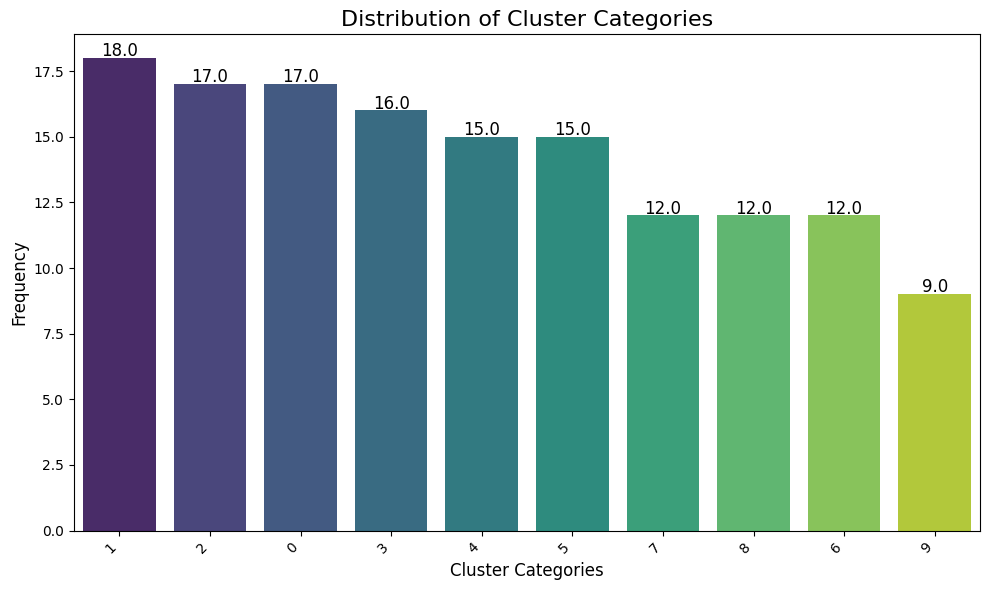

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better clarity
plt.figure(figsize=(10, 6))

# Create the seaborn bar chart for the distribution of cluster labels
ax = sns.countplot(data=wikileaks_df, x='Cluster', order=wikileaks_df['Cluster'].value_counts().index, palette='viridis')

# Add title and labels
plt.title('Distribution of Cluster Categories', fontsize=16)
plt.xlabel('Cluster Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


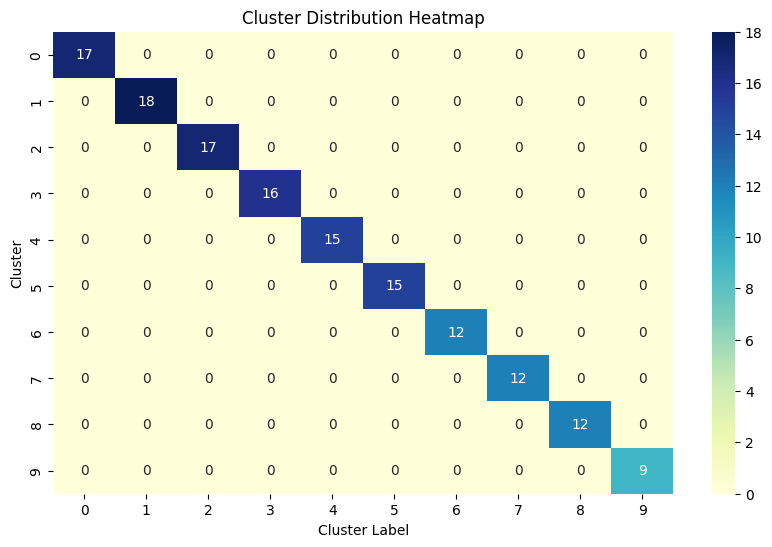

In [170]:
#heatmap
import seaborn as sns
plt.figure(figsize=(10, 6))
cluster_distribution = pd.crosstab(wikileaks_df['Cluster'], wikileaks_df['Cluster'])
sns.heatmap(cluster_distribution, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Cluster Distribution Heatmap')
plt.ylabel('Cluster')
plt.xlabel('Cluster Label')
plt.show()

In [173]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Convert embeddings to NumPy arrays for test data
X_test = np.vstack(wikileaks_df['sbert_embedding'])
y_test = wikileaks_df['Cluster']  

# Train the stacking model (if not already trained)
stacking_model.fit(X_train, y_train)

# Test on stacking_model
y_pred_stack = stacking_model.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Model Accuracy: {accuracy_stack}")

# # Train the SVM model (if not already trained)
# svm_model = SVC()  # Initialize SVM model
# svm_model.fit(X_train, y_train)  # Fit the model

# # Test on svm_model
# y_pred_svm = svm_model.predict(X_test)
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print(f"SVM Model Accuracy: {accuracy_svm}")


Stacking Model Accuracy: 0.06993006993006994


This experiment applied a stacking model trained on news excerpts to predict clusters in the Wikileaks dataset. While the model showed some potential, the accuracy (0.07) highlights the challenges of domain mismatch and the limited size of the Wikileaks dataset. To improve performance, future work should focus on fine-tuning the model with Wikileaks-specific data, experimenting with domain-tuned embeddings, and optimizing hyperparameters. Despite the low initial accuracy, the project provides valuable insights into the difficulties of transferring models across different domains.